In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **`[Import Section]`**

In [ ]:
import numpy as np # store images

import os # manage directory and files

from skimage import io, transform # reading images and image processing
from sklearn.model_selection import train_test_split as tts # train validation set split

import matplotlib.pyplot as plt

import tensorflow as tf # DL
from tensorflow import keras # DL
from contextlib import contextmanager

import imutils
import cv2
from skimage.color import rgb2gray
!pip install mediapipe
import mediapipe as mp # pip install mediapipe
from keras.preprocessing.image import ImageDataGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 48.2 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 23.1.4 which is incompatible.


# **`Define context With Test`**

In [ ]:
@contextmanager
def chdir(path):
    cwd = os.getcwd()
    os.chdir(path)    
    
    try:
        yield
        
    finally:
        os.chdir(cwd)

In [ ]:
def preprocessfingers(image, thick):
  image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
  results = hands.process(image)
  if results.multi_hand_landmarks:
    for handLms in results.multi_hand_landmarks:
        mpDraw.draw_landmarks(image, handLms, mpHands.HAND_CONNECTIONS, mpDraw.DrawingSpec(color=(245,66,230), thickness=1, circle_radius=1), mpDraw.DrawingSpec(color=(245,66,230), thickness = thick, circle_radius=0))

  handRegionHSV = cv2.inRange(image, lower, upper)
  blurred = cv2.blur(handRegionHSV, (2,2))
  ret,thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY)
  thresh = transform.resize(thresh, (128, 128))
  del handRegionHSV
  del blurred
  del image
  return thresh

In [ ]:
mpHands = mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils

lower = np.array([245, 66, 230], dtype = "uint8")
upper = np.array([245, 66, 230], dtype = "uint8")

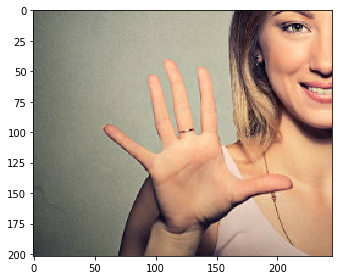

In [ ]:
with chdir('/content/drive/MyDrive/fingerCountingProject/mydataset/train'):
    testimage = io.imread('fingerscounting593images5.PNG')
io.imshow(testimage)

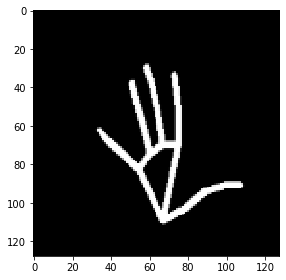

In [ ]:
preprocessedImage = preprocessfingers(testimage, 4)
io.imshow(preprocessedImage)

# **`Import images dataset and data Augmentation`**

In [ ]:
from skimage.color import rgb2gray
def import_data():
    train_img = [] # x train
    train_label = [] # y train
    test_img = [] # x test
    test_label = [] # y test
    imageDataGenW = ImageDataGenerator(width_shift_range = [30, -30])
    imageDataGenH = ImageDataGenerator(height_shift_range = [30, -30])
    with chdir('/content/drive/MyDrive/fingerCountingProject/mydataset/test'):
        for f in os.listdir():
            img = io.imread(f)

            result = preprocessfingers(img, 4)
            rotated = imutils.rotate(result, -45) # Image Augmentation by flipping

            # ----------------
            dataImage = tf.keras.utils.img_to_array(result)
            dataImage = np.reshape(dataImage, (1, 128, 128, 1))
            iterator = imageDataGenW.flow(dataImage, batch_size = 1)
            batch = iterator.next()
            iterator2 = imageDataGenH.flow(batch, batch_size = 1)
            batch = iterator2.next()

            shiftedImage = np.reshape(batch, (128, 128))
            rotat_shiftedImage = cv2.flip(shiftedImage, 1)
            del iterator
            del iterator2
            # ----------------

            test_img.append(result)
            test_img.append(rotated)
            test_img.append(shiftedImage)
            test_img.append(rotat_shiftedImage)
            test_label.append(f[-5]) # label is the second last character befor extension (....5R.png)
            test_label.append(f[-5])
            test_label.append(f[-5])
            test_label.append(f[-5])
    i = 0
    with chdir('/content/drive/MyDrive/fingerCountingProject/fingers/test'):
        for f in os.listdir():
            img = io.imread(f)

            result = preprocessfingers(img, 2)

            # ----------------
            dataImage = tf.keras.utils.img_to_array(result)
            dataImage = np.reshape(dataImage, (1, 128, 128, 1))
            iterator = imageDataGenW.flow(dataImage, batch_size = 1)
            batch = iterator.next()
            iterator2 = imageDataGenH.flow(batch, batch_size = 1)
            batch = iterator2.next()
            shiftedImage = np.reshape(batch, (128, 128))
            rotat_shiftedImage = cv2.flip(shiftedImage, 1)
            del iterator
            del iterator2
            # ----------------

            test_img.append(result)
            test_img.append(shiftedImage)
            test_img.append(rotat_shiftedImage)
            test_label.append(f[-6])
            test_label.append(f[-6])
            test_label.append(f[-6])
            i = i + 1
            if (i == 3):
              break

    with chdir('/content/drive/MyDrive/fingerCountingProject/mydataset/train'):
        for f in os.listdir():
            img = io.imread(f)
 
            # -----------------
            result = preprocessfingers(img, 4)
            rotated = imutils.rotate(result, -45) # Image Augmentation by flipping
            # ----------------

            # ----------------
            dataImage = tf.keras.utils.img_to_array(result)
            dataImage = np.reshape(dataImage, (1, 128, 128, 1))
            iterator = imageDataGenW.flow(dataImage, batch_size = 1)
            batch = iterator.next()
            iterator2 = imageDataGenH.flow(batch, batch_size = 1)
            batch = iterator2.next()
            shiftedImage = np.reshape(batch, (128, 128))
            rotat_shiftedImage = cv2.flip(shiftedImage, 1)
            del iterator
            del iterator2
            # ----------------

            train_img.append(result)
            train_img.append(rotated)
            train_img.append(shiftedImage)
            train_img.append(rotat_shiftedImage)
            train_label.append(f[-5]) # label is the second last character befor extension (....5R.png)
            train_label.append(f[-5])
            train_label.append(f[-5])
            train_label.append(f[-5])

    i = 0
    with chdir('/content/drive/MyDrive/fingerCountingProject/fingers/train'):
        for f in os.listdir():
            img = io.imread(f)

            result = preprocessfingers(img, 2)

            # ----------------
            dataImage = tf.keras.utils.img_to_array(result)
            dataImage = np.reshape(dataImage, (1, 128, 128, 1))
            iterator = imageDataGenW.flow(dataImage, batch_size = 1)
            batch = iterator.next()
            iterator2 = imageDataGenH.flow(batch, batch_size = 1)
            batch = iterator2.next()
            shiftedImage = np.reshape(batch, (128, 128))
            rotat_shiftedImage = cv2.flip(shiftedImage, 1)
            del iterator
            del iterator2
            # ----------------

            train_img.append(result)
            train_img.append(shiftedImage)
            train_img.append(rotat_shiftedImage)
            train_label.append(f[-6])
            train_label.append(f[-6])
            train_label.append(f[-6])

            i = i + 1
            if (i == 15):
              break
            
    return np.array(train_img), np.array(train_label), np.array(test_img), np.array(test_label) # convert to numpy

#  calling function to import 
xtrain, ytrain, xtest, ytest = import_data()


xtrain: (2265, 128, 128, 1)
ytrain: (2265, 6)
xtest: (1021, 128, 128, 1)
ytest: (1021, 6)
[0. 0. 0. 0. 0. 1.]


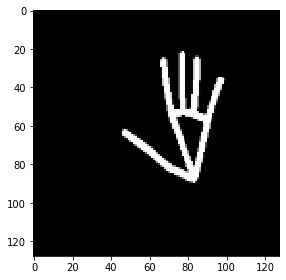

In [ ]:
xtrain = xtrain.reshape(xtrain.shape[0], 128, 128, 1)
xtest = xtest.reshape(xtest.shape[0], 128, 128, 1)

ytrain = keras.utils.to_categorical(ytrain, num_classes = 6)
ytest = keras.utils.to_categorical(ytest, num_classes = 6)

print(f"xtrain: {xtrain.shape}")
print(f"ytrain: {ytrain.shape}")

print(f"xtest: {xtest.shape}")
print(f"ytest: {ytest.shape}")
imm = xtrain[24].reshape(128,128)
print(ytrain[24])
io.imshow(imm)

# **`Split train data to train validation`**

In [ ]:
# x_train, x_val, y_train, y_val = tts(xtrain, ytrain, test_size = 5794/16890, random_state = 0, shuffle = True)

# **`Model Creation & Compilation`**

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), input_shape = (128, 128, 1), activation = 'relu'),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    # keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    # keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    # keras.layers.Conv2D(256, (3,3), activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dropout(0.4),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(6, activation = 'softmax')       
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 128)      

In [ ]:
model.compile(optimizer='adamax', loss = 'categorical_crossentropy',metrics = ['accuracy'])

# **`Training the model on our PreProcessed images`**

In [ ]:
history = model.fit(xtrain, ytrain,
                    epochs = 5, 
                    validation_data = (xtest, ytest),
                    verbose = 1,
                    batch_size = 16,
                    initial_epoch = 0)

Epoch 1/5
142/142 [==============================] - 4s 24ms/step - loss: 1.6233 - accuracy: 0.2494 - val_loss: 1.6351 - val_accuracy: 0.2292
Epoch 2/5
142/142 [==============================] - 3s 20ms/step - loss: 1.5595 - accuracy: 0.3148 - val_loss: 1.5918 - val_accuracy: 0.2439
Epoch 3/5
142/142 [==============================] - 3s 20ms/step - loss: 1.4317 - accuracy: 0.4000 - val_loss: 1.5024 - val_accuracy: 0.3301
Epoch 4/5
142/142 [==============================] - 3s 20ms/step - loss: 1.2550 - accuracy: 0.4874 - val_loss: 1.4733 - val_accuracy: 0.3937
Epoch 5/5
142/142 [==============================] - 3s 20ms/step - loss: 1.0741 - accuracy: 0.5748 - val_loss: 1.4894 - val_accuracy: 0.4114


# **`Evaluate && Save Model`**

In [ ]:
predict = model.evaluate(xtest, ytest, batch_size = 64)
print(f"Accuracy: {predict[1]*100}")

30/30 [==============================] - 27s 886ms/step - loss: 0.9288 - accuracy: 0.6689
Accuracy: 66.89330339431763


In [ ]:
model.save('/content/drive/MyDrive/finger_counter_FINAL_last')

# **`Summarizing`**

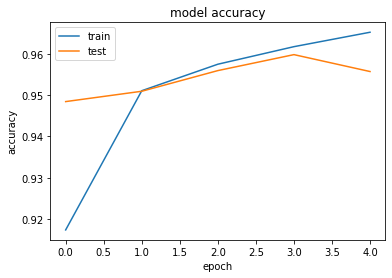

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

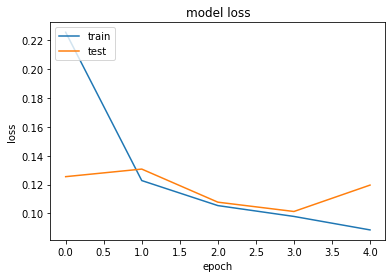

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **`Use Model`**
## load model from drive

In [ ]:
myFinalModel = keras.models.load_model('/content/drive/MyDrive/finger_counter_FINAL_last')

OSError: ignored

(1104, 1472, 3)
(128, 128)
1/1 [==============================] - 0s 183ms/step
actual label: 2
predicted label: 3


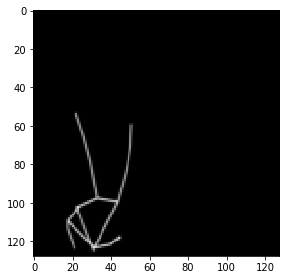

In [ ]:
f = '/content/drive/MyDrive/tobetested/omar_2.jpg'
img = io.imread(f)
print(img.shape)
# img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR);

processed_img = preprocessfingers(img, 6)
print(processed_img.shape)
toTest = np.reshape(processed_img, (1, 128, 128, 1))
io.imshow(processed_img)
y = f[-5]
y_hat = model.predict(toTest)
print(f"actual label: {y}")
print(f"predicted label: {np.argmax(y_hat)}")
# io.imshow(processed_img)

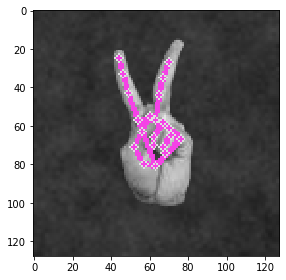

In [ ]:
with chdir('/content/drive//MyDrive/fingers/train'):
    image = io.imread('fffaffc3-3fe7-44b6-94a1-3e31852dab77_2L.png')
image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR);

mpHands = mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils
results = hands.process(image)
if results.multi_hand_landmarks:
    for handLms in results.multi_hand_landmarks:
      mpDraw.draw_landmarks(image, handLms, mpHands.HAND_CONNECTIONS, mpDraw.DrawingSpec(color=(245,66,230), thickness=1, circle_radius=1), mpDraw.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=0))
io.imshow(image)

(128, 128)


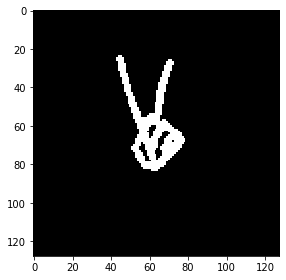

In [ ]:
# hsvim = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower = np.array([245, 66, 230], dtype = "uint8")
upper = np.array([245, 66, 230], dtype = "uint8")
skinRegionHSV = cv2.inRange(image, lower, upper)
blurred = cv2.blur(skinRegionHSV, (2,2))
ret,thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY)
thresh = transform.resize(thresh, (128, 128))
io.imshow(thresh)
print(thresh.shape)

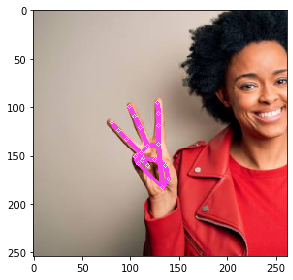

In [ ]:
with chdir('/content/drive//MyDrive/mydataset/train'):
    image = io.imread('fingerscounting793image3.PNG')
image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR);

mpHands = mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils

results = hands.process(image)
if results.multi_hand_landmarks:
  for handLms in results.multi_hand_landmarks:
    mpDraw.draw_landmarks(image, handLms, mpHands.HAND_CONNECTIONS, mpDraw.DrawingSpec(color=(245,66,230), thickness=1, circle_radius=1), mpDraw.DrawingSpec(color=(245,66,230), thickness=4, circle_radius=0))
io.imshow(image)

# with chdir('/content/drive//MyDrive/tobetested'):
#     image = io.imread('geo_3.jpg')
# print(image.shape)
# img = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
# print(img.shape)
# img2 = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)
# print(img2.shape)
# io.imshow(img2)
# img3 = preprocessfingers(img2, 4)
# io.imshow(img)
# print(img3.shape)

(254, 262)


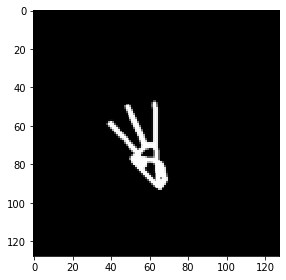

In [ ]:
# hsvim = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower = np.array([245, 66, 230], dtype = "uint8")
upper = np.array([245, 66, 230], dtype = "uint8")
skinRegionHSV = cv2.inRange(image, lower, upper)
blurred = cv2.blur(skinRegionHSV, (2,2))
ret,thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY)
img = transform.resize(thresh, (128, 128))
io.imshow(img)
print(thresh.shape)

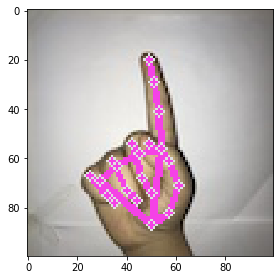

In [ ]:
with chdir('/content/drive//MyDrive'):
    image = io.imread('IMG_4130.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR);

imageRGB = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
mpHands = mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils

results = hands.process(image)
if results.multi_hand_landmarks:
    for handLms in results.multi_hand_landmarks:
      mpDraw.draw_landmarks(image, handLms, mpHands.HAND_CONNECTIONS, mpDraw.DrawingSpec(color=(245,66,230), thickness=1, circle_radius=1), mpDraw.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
io.imshow(image)

(100, 100)


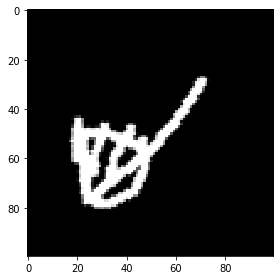

In [ ]:
# hsvim = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower = np.array([245, 66, 230], dtype = "uint8")
upper = np.array([245, 66, 230], dtype = "uint8")
skinRegionHSV = cv2.inRange(image, lower, upper)
blurred = cv2.blur(skinRegionHSV, (2,2))
ret,thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY)
io.imshow(thresh)
print(thresh.shape)
rot = imutils.rotate(thresh, -45)
io.imshow(rot)

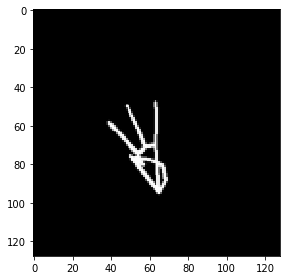

In [ ]:
with chdir('/content/drive//MyDrive/mydataset/train'):
    image = io.imread('fingerscounting793image3.PNG')
io.imshow(image)
image = preprocessfingers(image)
cv2.waitKey(0)
io.imshow(image)

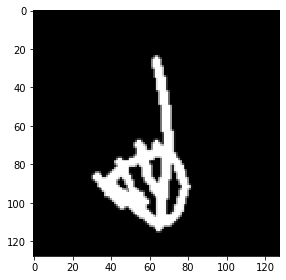